In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

Let's define $f(x,y) = x^2 + y^2 + 2x$ as our function that we want to minimize.

In [2]:
def fun(x, y):
  return x**2 + y**2 + 2*x

We'll use matplotlib to plot our function.

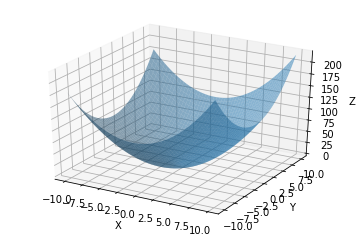

In [3]:
# Pick our boundary
boundary = 10

# Plot our function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# x, y, render_rate
x = y = np.arange(-boundary, boundary, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, zorder=1, alpha=.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [4]:
# Choose a random starting point on our surface
x_pos = random.uniform(1, boundary)
y_pos = random.uniform(1, boundary)

z_pos = fun(x_pos, y_pos)
# Our starting point
(x_pos, y_pos, z_pos)

(8.100104172161181, 2.233293272791301, 86.79949478648021)

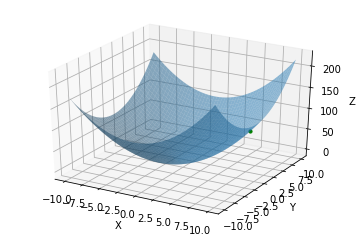

In [5]:
# Plot our starting point
ax.scatter(x_pos, y_pos, z_pos, color='green', s=10, zorder=100)
fig

Let's find our gradient vector. To do that, we take the partial deriviative with respect to each variable. $ \nabla f = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]$. The gradient vector defines the direction of the function at any given point.

In [6]:
from sympy import symbols, diff

# Define our function
x, y = symbols('x y', real=True)
f = x**2 + y**2 + 2*x

def gradient(f, x1, y1):
    return np.array([diff(f, x).subs({x: x1, y:y1}), diff(f, y).subs({y: y1, x: x1})])

In [7]:
learning_rate = .1 # eta
iterations = 25

$ -\nabla f(x,y) \eta + \nabla f(x,y) $

In [8]:
for i in range(iterations):
    delta = (-gradient(f, x_pos, y_pos) * learning_rate).transpose()
    x_pos, y_pos = [x_pos, y_pos] + delta
    ax.scatter(x_pos, y_pos, fun(x_pos, y_pos), color='green', s=10, zorder=100)

In [9]:
x_pos, y_pos

(-0.965620778453411, 0.00843714343827831)

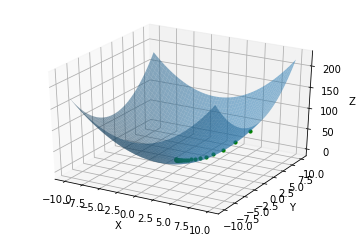

In [10]:
fig

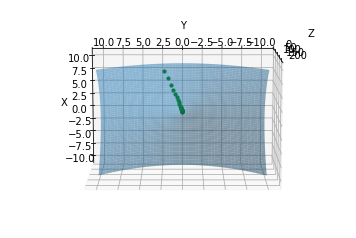

In [11]:
# rotate the axes to get a better look
ax.view_init(100,180)
fig